In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/SkatAI/efrei-ml/refs/heads/master/data/weight_height.csv")

In [5]:
df.head()

,sex,age,height,weight,sort
0,f,147,59.5,101.0,14
1,m,160,59.3,78.5,93
2,f,148,59.0,95.0,61
3,m,149,57.0,92.0,63
4,m,156,61.5,108.5,28


In [12]:
X = df[['weight', 'height', 'age']]  # Features for clustering
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X)

In [16]:
# X = df[['weight', 'height', 'age']]  # Select features for clustering
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_pca)
labels = kmeans.labels_
df['Cluster'] = labels

In [14]:
df


,sex,age,height,weight,sort,Cluster
0,f,147,59.5,101.0,14,3
1,m,160,59.3,78.5,93,1
2,f,148,59.0,95.0,61,1
3,m,149,57.0,92.0,63,1
4,m,156,61.5,108.5,28,3
...,...,...,...,...,...,...
232,f,178,61.5,103.5,97,0
233,f,166,59.3,89.5,96,1
234,f,193,59.8,115.0,70,0
235,m,166,62.5,84.0,68,1


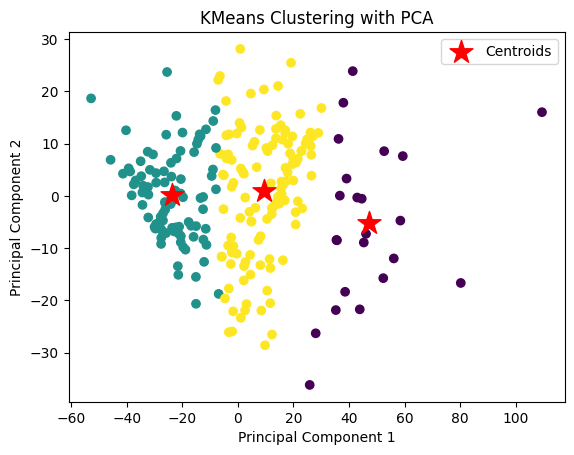

In [17]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.title('KMeans Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()